In [267]:
# Use /usr/local/bin/python3 Kernel

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

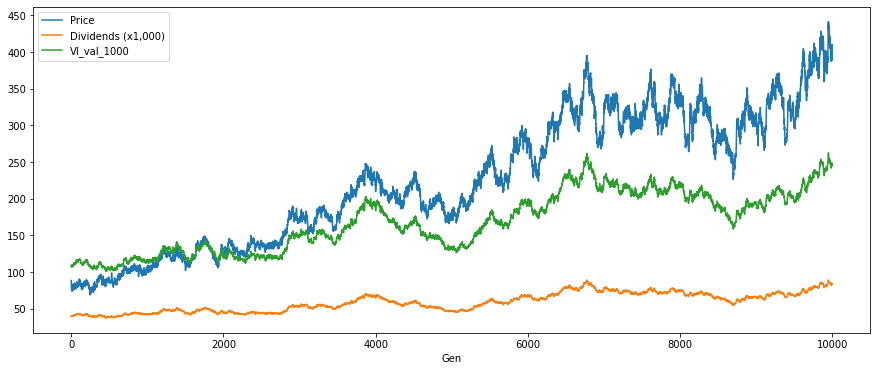

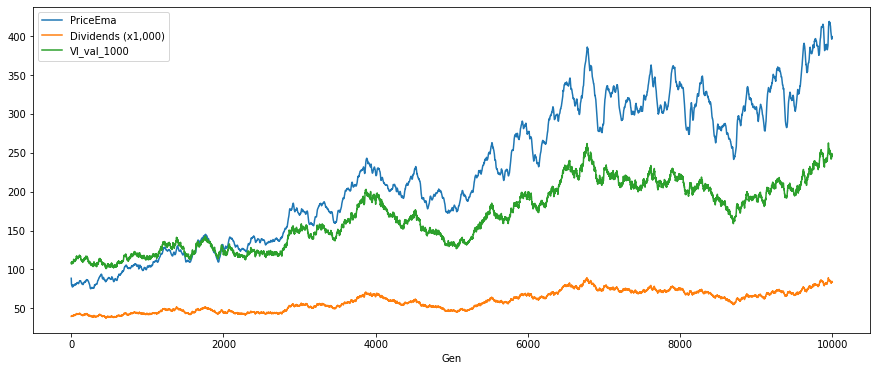

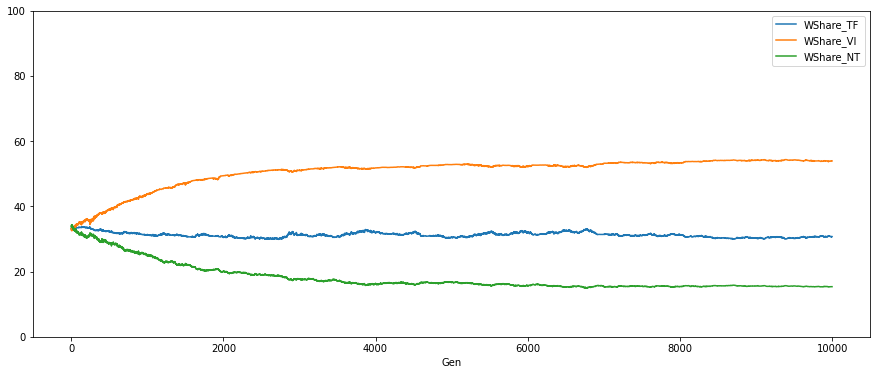

In [269]:
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df['PriceEma'] = pd.Series.ewm(df['Price'], span=21).mean()

df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ['PriceEma', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()


df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
# plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

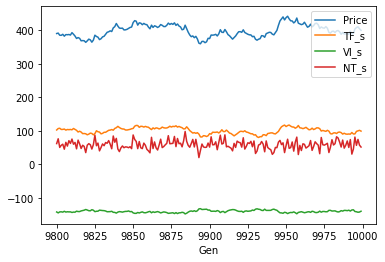

In [270]:
df["VI_s"] = [200 * np.tanh(x + 0.5) for x in df["VI_signal"]]
df["TF_s"] = [200 * np.tanh(x + 0.5) for x in df["TF_signal"]]
df["NT_s"] = [200 * np.tanh(x + 0.5) for x in df["NT_signal"]]
df.tail(200).plot(x="Gen", y=["Price", "TF_s", "VI_s", "NT_s"])
plt.show()

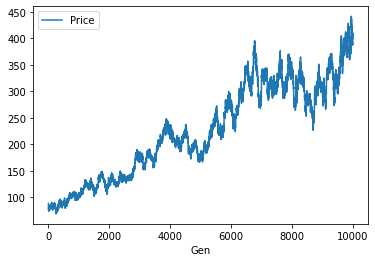

In [271]:

df.plot(x="Gen", y="Price")
plt.show()


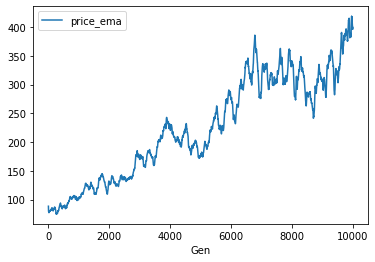

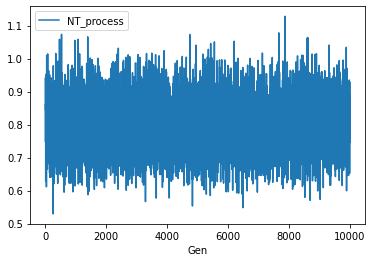

In [272]:
df['price_ema'] = pd.Series.ewm(df['Price'], span=21).mean()

df.plot(x="Gen", y="price_ema")
plt.show()

df.plot(x="Gen", y="NT_process")
plt.show()


0.027776117428688227
10000
0.027776117428688227
nan


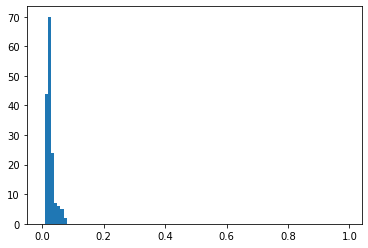

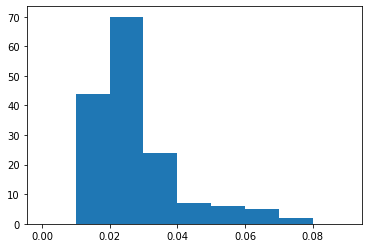

In [273]:
pct_changes = list(df['nav_pct'])
# print(pct_changes)
print(np.nanmean(pct_changes))
print(len(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 100:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
bins = range(0,10)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()


short volume ratio
1.0930669012000302
Short ratio (numb short sold / avg rolling volume)
173064.25054133427
0.21797406386631923
Short % of float 
1.0810175302068463


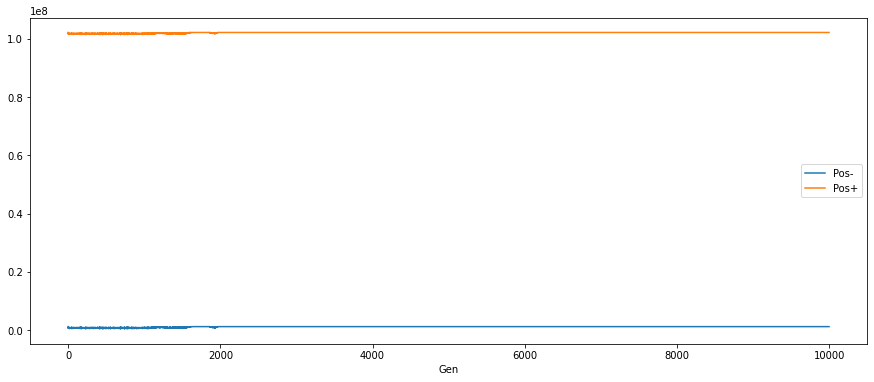

In [274]:
# Calibration of short volume ratio

print('short volume ratio')
asset_supply = df["Pos+"].mean() - df["Pos-"].mean()
# Average short volume ratio in our ABM:
print(100 * df["Pos-"].mean() / asset_supply)

print('Short ratio (numb short sold / avg rolling volume)')
# Short interest ratio as days to cover
df["short_ratio"] = df["Pos-"] / (df["Volume"] + 1)
print(df["short_ratio"].mean())
print(df["Pos-"].mean() / df["Volume"].mean())

# Short interest as percentage of float (outstanding)
print('Short % of float ')
df["FloatPer"] = df["Pos-"] / df["Pos+"]
# df["FloatPer"] = df["Pos-"] / asset_supply
print(100 * df["FloatPer"].mean())

df.plot(x="Gen", y = ["Pos-", "Pos+"],
        kind="line", figsize=(15, 6))
plt.show()

# the short volume ratio and short percentage of float are consistent after limiting max short size
# However, the short ratio (to volumne) is higher. It mostly means that the short positions are liquidated much faster in our model. 
# But siunce they still occupy the same relative amount to outstanding shares, it just means that they are closed/opened at higher frequencies
# than in regular data. Which makes sense because not all happens at a daily scale, and there are some funds who maintain short positions
# over long time horizons.

In [275]:
print(df['WShare_VI'].iloc[-1])
print(df['WShare_NT'].iloc[-1])
print(df['WShare_TF'].iloc[-1])

53.90442704846523
15.36812857046514
30.727444381069617


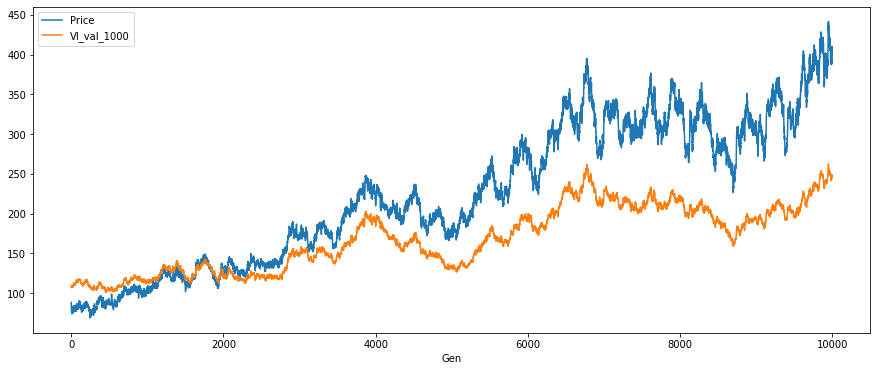

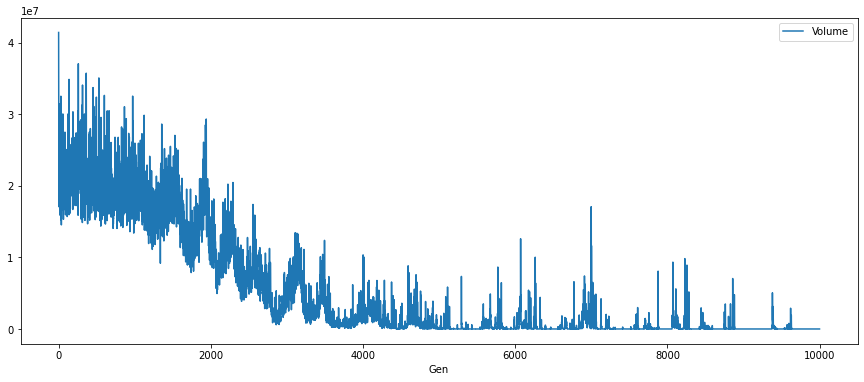

In [276]:


df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

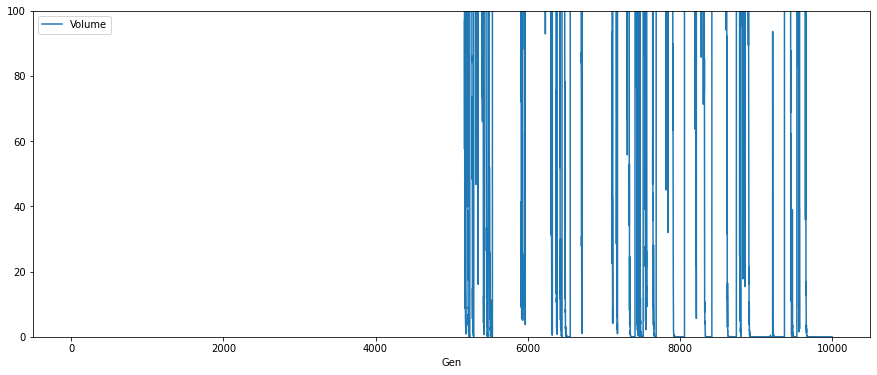

In [277]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6), ylim = (0, 100))
plt.show()

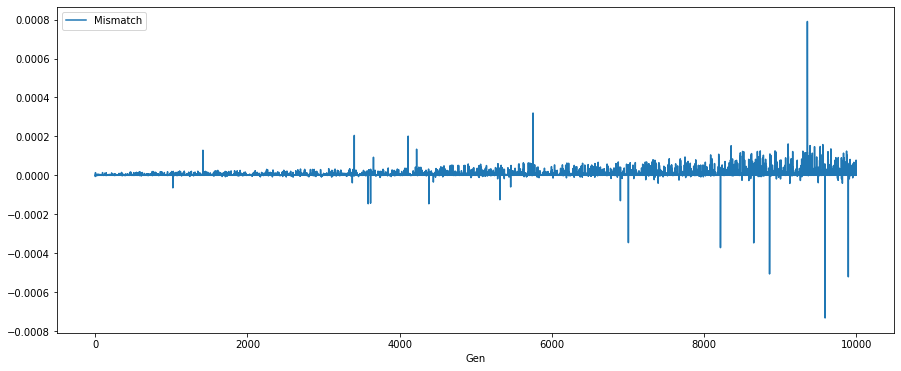

In [278]:

df.plot(x="Gen", y = ["Mismatch"],
        kind="line", figsize=(15, 6))
plt.show()


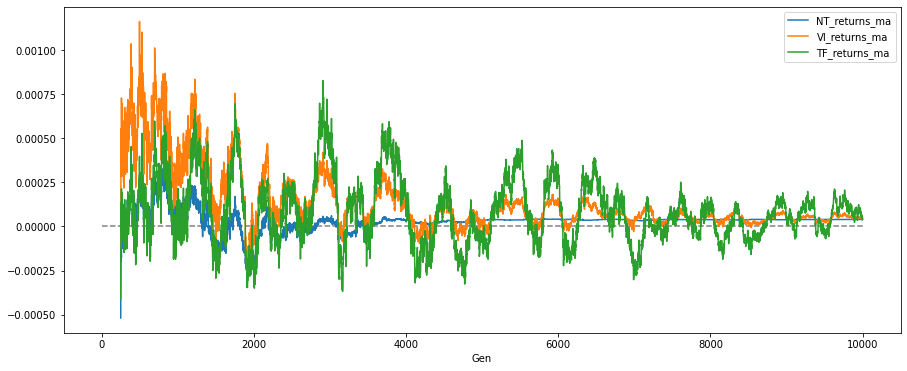

In [279]:
df["NT_returns_ma"] = df["NT_returns"].rolling(252*1).mean()
df["VI_returns_ma"] = df["VI_returns"].rolling(252*1).mean()
df["TF_returns_ma"] = df["TF_returns"].rolling(252*1).mean()

df.plot(x="Gen", y = ["NT_returns_ma", "VI_returns_ma", "TF_returns_ma"],
        kind="line", figsize=(15, 6))
plt.hlines(y=0, xmin = 0, xmax = max(df["Gen"]), colors='gray', linestyles='dashed')
plt.show()

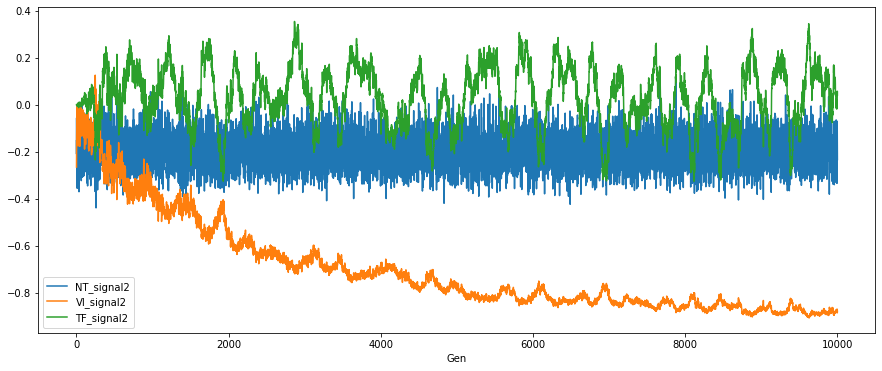

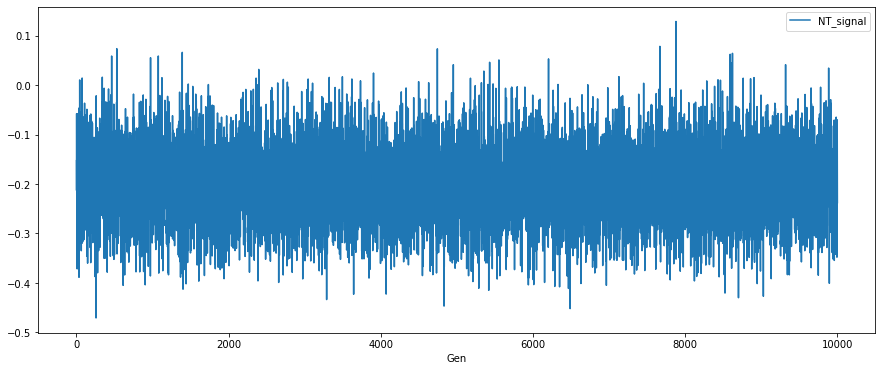

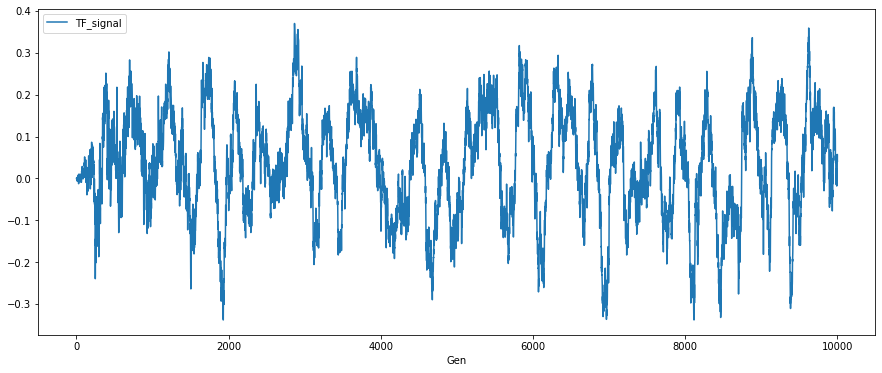

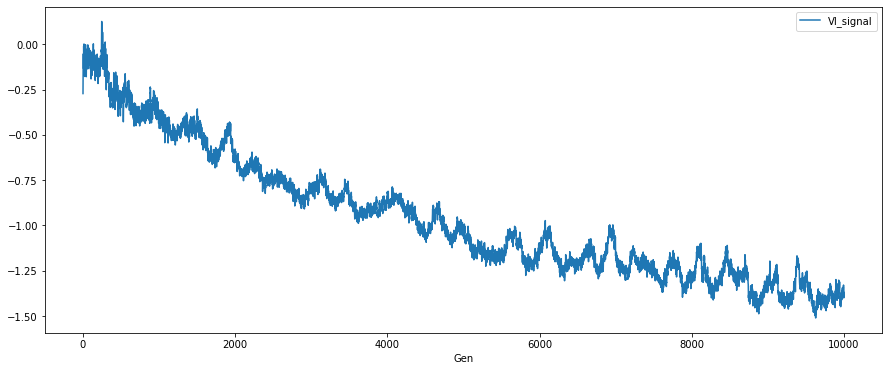

In [280]:
df['NT_signal2'] = np.tanh(df['NT_signal'])
df['VI_signal2'] = np.tanh(df['VI_signal'])
df['TF_signal2'] = np.tanh(df['TF_signal'])

df.plot(x="Gen", y=["NT_signal2", "VI_signal2", "TF_signal2"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["NT_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["TF_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["VI_signal"],
        kind="line", figsize=(15, 6))
plt.show()


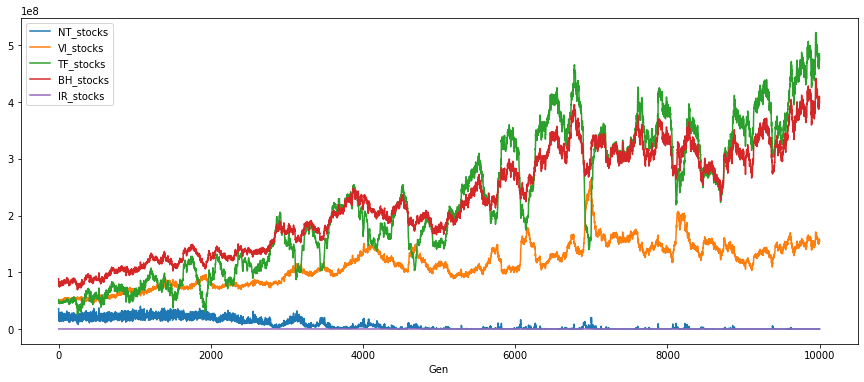

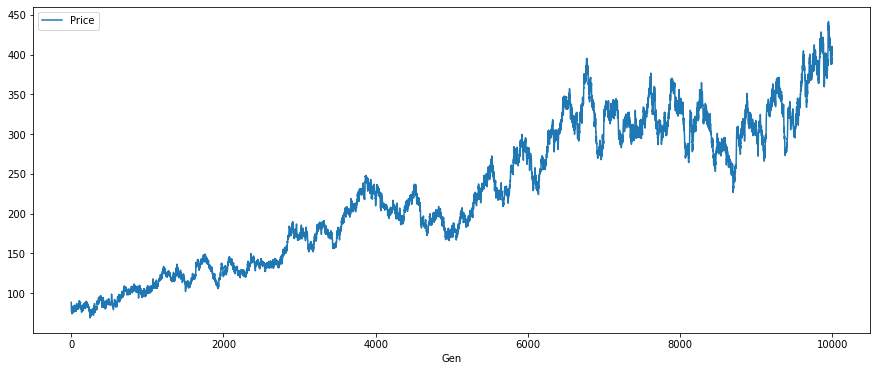

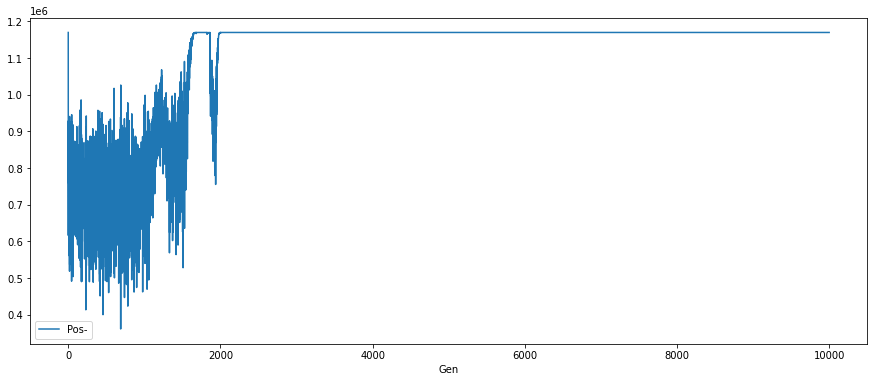

In [281]:
df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks", "BH_stocks", "IR_stocks"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()


df.plot(x="Gen", y = ["Pos-"],
        kind="line", figsize=(15, 6))
plt.show()


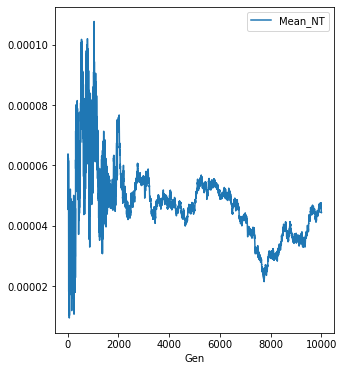

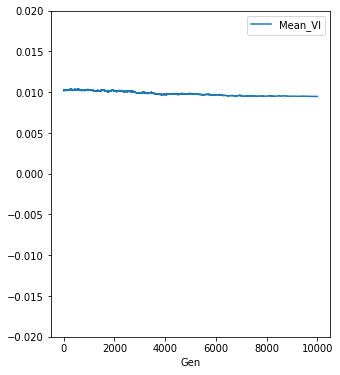

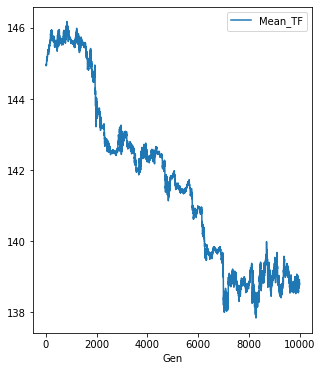

In [282]:

df.plot(x="Gen", y = ["Mean_NT"],
        kind="line", figsize=(5, 6))
plt.show()
df.plot(x="Gen", y = ["Mean_VI"],
        kind="line", figsize=(5, 6), ylim=(-0.02, 0.02))
plt.show()
df.plot(x="Gen", y = ["Mean_TF"],
        kind="line", figsize=(5, 6))
plt.show()

In [283]:
if df["Spoils"].sum() != 0:
        df.plot(x="Gen", y = ["Spoils"],
                kind="line", figsize=(15, 6))
        plt.show()


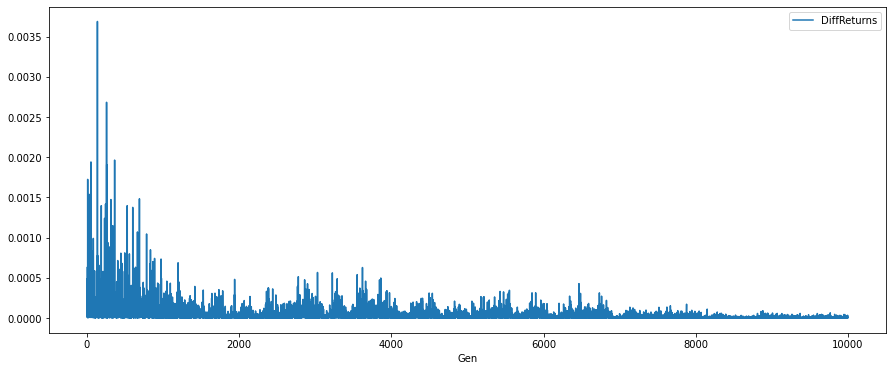

In [284]:
df.plot(x="Gen", y = ["DiffReturns"],
        kind="line", figsize=(15, 6))
plt.show()

In [285]:
SharpeNT = np.nanmean(df['NT_returns']) / np.nanstd(df['NT_returns'])
SharpeVI = np.nanmean(df['VI_returns']) / np.nanstd(df['VI_returns'])
SharpeTF = np.nanmean(df['TF_returns']) / np.nanstd(df['TF_returns'])

print('Daily Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Daily mean returns 2 ')
print([np.nanmean(df['NT_returns']), np.nanmean(df['VI_returns']), np.nanmean(df['TF_returns'])])

DiffSharpe = (SharpeNT - SharpeVI) ** 2  + (SharpeNT - SharpeTF) ** 2 + (SharpeVI - SharpeTF) ** 2
print(DiffSharpe)



Daily Sharpe ratios 
0.00875336406105689 0.026690748222656165 0.013325671657971805
Daily mean returns 2 
[1.9435170905187554e-05, 0.00013600165705884878, 7.782599198299003e-05]
0.0005212810189014734


0.0


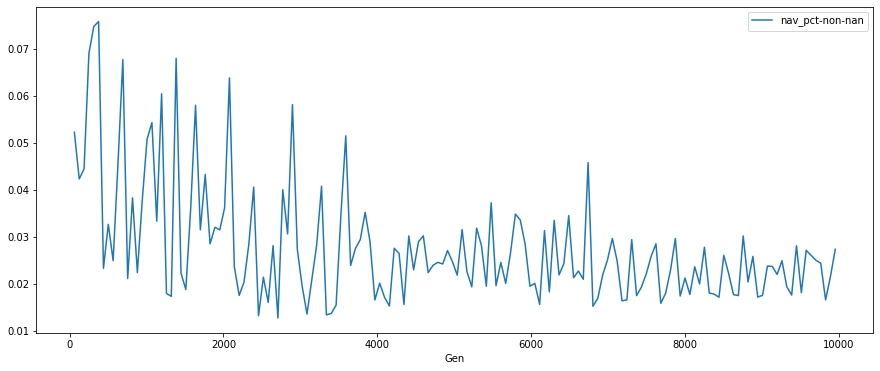

In [286]:
print(df['Rep'].sum())
if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

df2 = pd.DataFrame()
df2['nav_pct-non-nan'] = df['nav_pct'].dropna()
df2['nav_pct-non-nan'] = df2['nav_pct-non-nan'][df2['nav_pct-non-nan'] <1000]
df2['Gen'] = df['Gen']
df2.plot(x="Gen", y = ['nav_pct-non-nan'],
                kind="line", figsize=(15, 6))
plt.show()

In [287]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [288]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

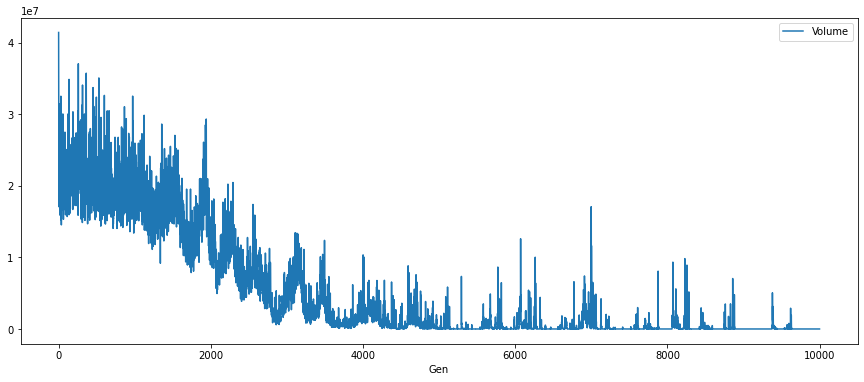

0       4.142627e+07
1       3.261831e+07
2       2.146055e+07
3       2.010643e+07
4       1.709940e+07
            ...     
9995    6.770844e-29
9996    3.617902e-29
9997    7.997216e-28
9998    1.052196e-28
9999    1.199885e-28
Name: Volume, Length: 10000, dtype: float64


In [289]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

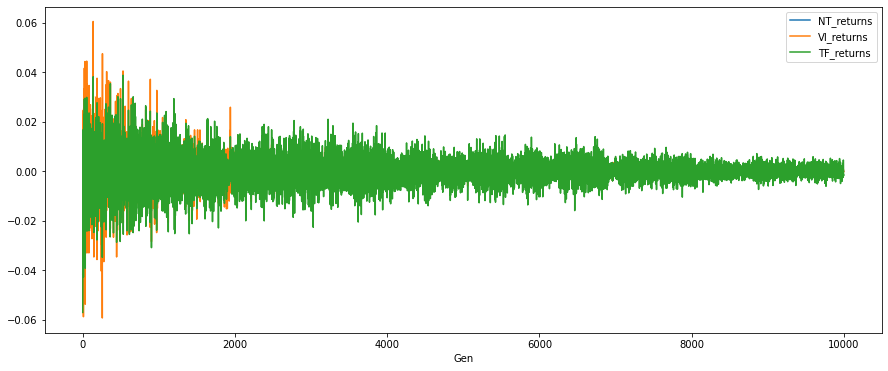

In [290]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6))
plt.show()

# df['DiffReturns'] = (df['NT_returns'] - df['VI_returns']) ** 2 + (df['NT_returns'] - df['TF_returns']) ** 2 + (df['VI_returns'] - df['TF_returns']) ** 2



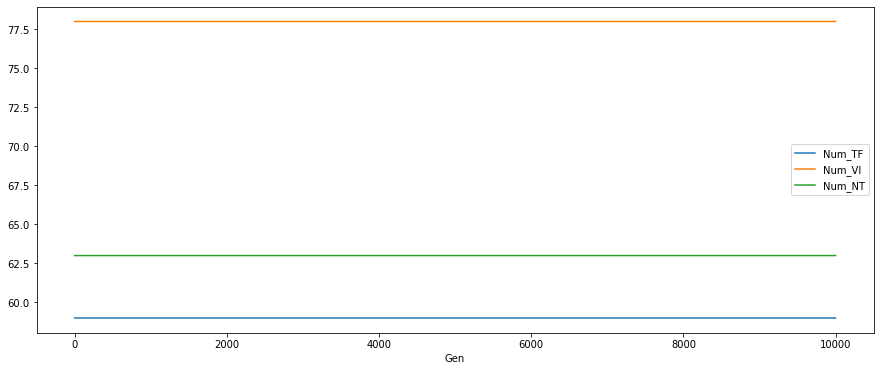

In [291]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


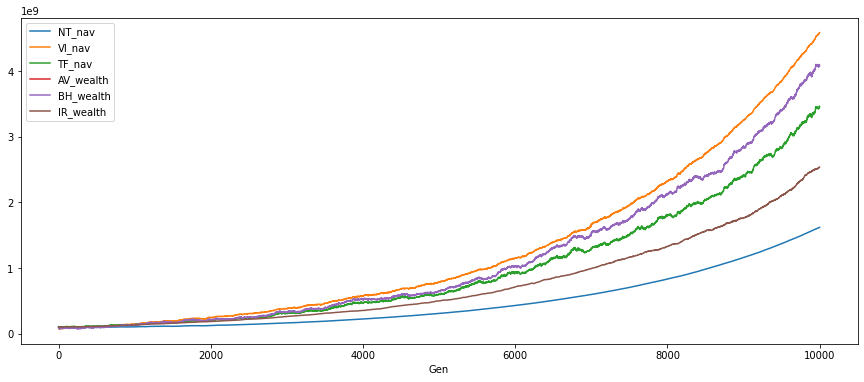

In [292]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav", "AV_wealth", "BH_wealth", "IR_wealth"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y="AV_wealth")
plt.show()
